In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Chandrashekar S/New Volume/Machine learning/Kaggle Competion/titanic/train.csv',index_col=['PassengerId'])
df.head()

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)
pd.set_option('display.width', 1000)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


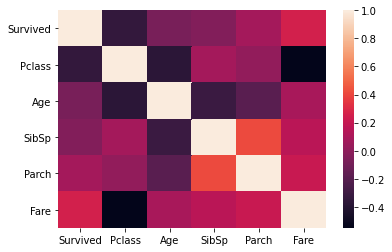

In [2]:
df.info()
sns.heatmap(df.corr())

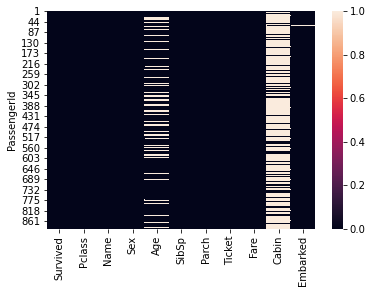

In [3]:
sns.heatmap(df.isna())

In [4]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

df["Age_tf"] = df["Age"]
df.head(2)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0


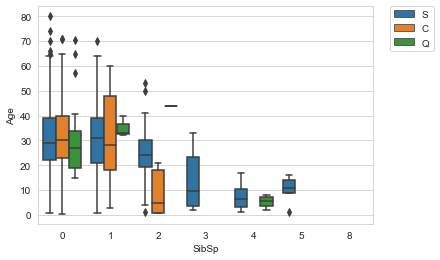

In [5]:
sns.set_style(style='whitegrid')
sns.boxplot("SibSp","Age",hue="Embarked"
            ,data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [6]:
def age_tf(sipsp,embarked,age):
    for x in df.index:
        if(np.isnan(df.Age_tf[x]) ):
            if((df.SibSp[x] == sipsp) & (df.Embarked[x] == embarked) ):
                df.Age_tf[x] = age
                #print(x)
                pass
            pass
        pass
    pass

age_tf(0,'S',29)
age_tf(0,'C',30)
age_tf(0,'Q',27)

age_tf(1,'S',31)
age_tf(1,'C',28)
age_tf(1,'Q',33)

age_tf(2,'S',24)
age_tf(2,'C',5)
age_tf(2,'Q',44)

age_tf(3,'S',10)

age_tf(4,'S',7)
age_tf(4,'Q',6)

age_tf(5,'S',11)


<ipython-input-6-c00ede17419b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Age_tf    884 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 105.1+ KB


,Age_tf,SibSp,Embarked
PassengerId,,,
160,True,8,S
181,True,8,S
202,True,8,S
325,True,8,S
793,True,8,S
847,True,8,S
864,True,8,S


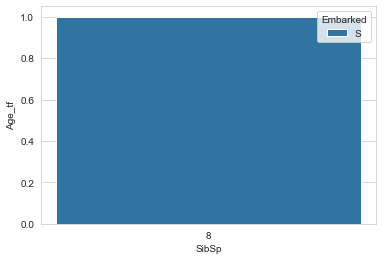

In [8]:
tr = df.Age_tf.isna()==True

Agena = df.loc[tr, ["Age_tf","SibSp",'Embarked']]


Agena.Age_tf.fillna(True,inplace=True)
sns.barplot('SibSp','Age_tf',hue="Embarked",data=Agena)
Agena
#sns.barplot("SibSp",'Age',data=df)


In [9]:
age_tf(8,'S',1)

<ipython-input-6-c00ede17419b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


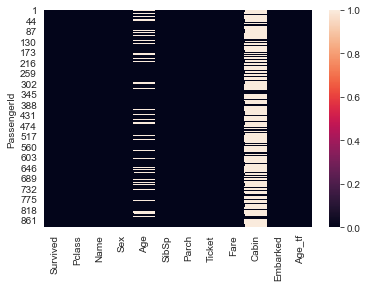

In [10]:
sns.heatmap(df.isna())

In [11]:
df.drop(columns = ['Cabin'],inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Age_tf    891 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 101.6+ KB


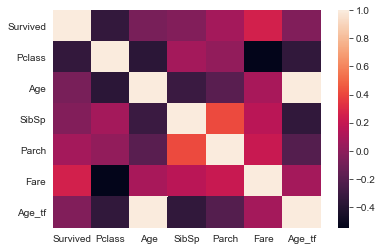

In [13]:
#sns.jointplot(x=['Age','Fare'],y='Survived',data=df)
sns.heatmap(df.corr())

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_tf'], dtype='object')

In [15]:
#for x in df.columns:
#    print(f'{x} : {df[x].value_counts()} \n') 

In [16]:
df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
 names = df['Name'].str.split(',',expand=True)
df['surname'] = names[0]
df['Names'] = names[1]
#df.drop(columns = ['Name'],inplace=True)
#df.rename(columns={'Names':'Name'},inplace=True)


Marriage_status = df['Names'].str.split('.',expand=True)
df['Marriage_status'] = Marriage_status[0]
df.head()                                             

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,Names,Marriage_status
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,Braund,Mr. Owen Harris,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,Heikkinen,Miss. Laina,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,Allen,Mr. William Henry,Mr


In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LB = LabelEncoder()
df['Sex_tf'] = LB.fit_transform(df['Sex'])

Sex_OH =  OneHotEncoder().fit_transform(df[['Sex_tf']]).toarray()

df['gender_male'] = Sex_OH[:,1]
df['gender_female'] = Sex_OH[:,0]
df.drop(columns=['Sex_tf'],inplace=True)
df.drop(columns=['Names'],inplace=True)
df.head(1)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,Marriage_status,gender_male,gender_female
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,22.0,Braund,Mr,1.0,0.0


In [19]:
df['Embarked_tf']= LB.fit_transform(df.Embarked)
OH_embarked = OneHotEncoder().fit_transform(df[['Embarked_tf']]).toarray()
#lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
df['Embarked_S'] = OH_embarked[:,2]
df['Embarked_Q'] = OH_embarked[:,1]
df['Embarked_C'] = OH_embarked[:,0]
df.drop(columns=['Embarked_tf'],inplace=True)
df.head()
 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,Marriage_status,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,Braund,Mr,1.0,0.0,1.0,0.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,Cumings,Mrs,0.0,1.0,0.0,0.0,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,Heikkinen,Miss,0.0,1.0,1.0,0.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,Futrelle,Mrs,0.0,1.0,1.0,0.0,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,Allen,Mr,1.0,0.0,1.0,0.0,0.0


In [20]:
df.info()
df.Marriage_status.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              714 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Embarked         891 non-null    object 
 10  Age_tf           891 non-null    float64
 11  surname          891 non-null    object 
 12  Marriage_status  891 non-null    object 
 13  gender_male      891 non-null    float64
 14  gender_female    891 non-null    float64
 15  Embarked_S       891 non-null    float64
 16  Embarked_Q       891 non-null    float64
 17  Embarked_C      

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Sir               1
 Ms                1
 the Countess      1
 Mme               1
 Don               1
 Capt              1
 Jonkheer          1
 Lady              1
Name: Marriage_status, dtype: int64

In [21]:
#for x in df.index:
    #print(df.Marriage_status[x])
#    if (df.Marriage_status[x] != " Mr"): # or " Miss" or " Mrs" or " Master"):
#        print(df.Marriage_status[x])
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Miss"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Mrs"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Master"):
        #df.Marriage_status[x] = 'others'
#    pass

df = pd.get_dummies(df, columns=['Marriage_status'], prefix = ['Name_prefix'])





    
#print(df.Marriage_status[x])
#df.Marriage_status.value_counts()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Survived                   891 non-null    int64  
 1   Pclass                     891 non-null    int64  
 2   Name                       891 non-null    object 
 3   Sex                        891 non-null    object 
 4   Age                        714 non-null    float64
 5   SibSp                      891 non-null    int64  
 6   Parch                      891 non-null    int64  
 7   Ticket                     891 non-null    object 
 8   Fare                       891 non-null    float64
 9   Embarked                   891 non-null    object 
 10  Age_tf                     891 non-null    float64
 11  surname                    891 non-null    object 
 12  gender_male                891 non-null    float64
 13  gender_female              891 non-null    float64

In [23]:
#df.surname.value_counts()
#df = pd.get_dummies(df, columns=['surname'], prefix = ['surname'])
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_tf,surname,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Capt,Name_prefix_ Col,Name_prefix_ Don,Name_prefix_ Dr,Name_prefix_ Jonkheer,Name_prefix_ Lady,Name_prefix_ Major,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mlle,Name_prefix_ Mme,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev,Name_prefix_ Sir,Name_prefix_ the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,Braund,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,Cumings,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,Heikkinen,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
#codes, uniques= pd.factorize(df['surname'])

#df.head(3)

In [25]:
#sns.countplot('Embarked_tf' ,data=df_final, hue='Survived',orient='v')

In [26]:
df_final = df

df.drop(columns=['Name','Sex','Age','Ticket','Embarked','surname','Name_prefix_ Capt','Name_prefix_ Jonkheer','Name_prefix_ Lady','Name_prefix_ Major','Name_prefix_ Mlle','Name_prefix_ Mme','Name_prefix_ Sir','Name_prefix_ the Countess'],inplace=True)
df_final.head(2)

,Survived,Pclass,SibSp,Parch,Fare,Age_tf,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Col,Name_prefix_ Don,Name_prefix_ Dr,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,7.2500,22.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0
2,1,1,1,0,71.2833,38.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0


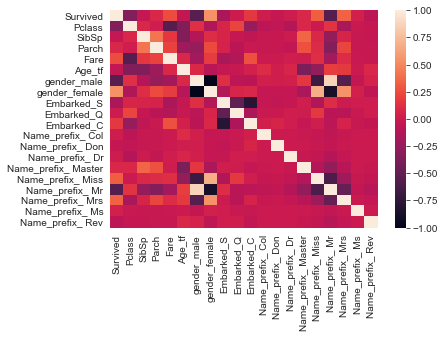

In [27]:
sns.heatmap(df_final.corr())

In [28]:
x = df_final.iloc[:,1:]
y = df_final.Survived


#from sklearn.preprocessing import Normalizer

#Norm = Normalizer()
#x = Norm.fit_transform(x)

#dx = pd.DataFrame(x)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

x

,Pclass,SibSp,Parch,Fare,Age_tf,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Col,Name_prefix_ Don,Name_prefix_ Dr,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,1,0,7.2500,22.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0
2,1,1,0,71.2833,38.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0
3,3,0,0,7.9250,26.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0
4,1,1,0,53.1000,35.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
5,3,0,0,8.0500,35.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,0,0,13.0000,27.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
888,1,0,0,30.0000,19.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0
889,3,1,2,23.4500,31.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0


In [29]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB,CategoricalNB,ComplementNB
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

preprocessors = {'StandardScaler':StandardScaler(),
                'MinMax':MinMaxScaler(),
                 'Robust':RobustScaler(),
                 'Normalizer':Normalizer()                
                }
Models = {'LR':LogisticRegression(),
          'SGD':SGDClassifier(),
          'KN':KNeighborsClassifier(n_neighbors=10),
          'BernouliNB':BernoulliNB(),
          'GaussiaNB':GaussianNB(),
          #'MutlinomialNB':MultinomialNB(),
          #'CategoricalNB':CategoricalNB(),
          #'ComplementNB':ComplementNB(),
          'SVC':SVC(),
          #'LSVC':LinearSVC(),
          'NuSVC':NuSVC(),
          'RFC':RandomForestClassifier(),
          'AdaBoost':AdaBoostClassifier(),
          'GradBoost':GradientBoostingClassifier(),
          'BaggingBoost':BaggingClassifier(),
          'ExtraTrees':ExtraTreesClassifier(),
          #'Voting':VotingClassifier(),
          'DecissionTree':DecisionTreeClassifier()            
        }


#LEftout classifiers
  # Gaussian Process Classification (GPC)

Best_preprocessor = ''
Best_model = ''
Best_accuracy_train_score = 0
Best_accuracy_test_score = 0

Random_state_map=[]
state = 0

In [30]:

for st in range(50):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=st)
    for i,pp in preprocessors.items():
        for j,classifier in Models.items():
            pipe_model = Pipeline([(i,pp),(j,classifier)])
            pipe_model.fit(X_train,y_train)
            yp=pipe_model.predict(X_test)
            #print(f'{i} & {j} Train Score: {pipe_model.score(X_train,y_train)}, Test Score:{pipe_model.score(X_test,y_test)} ')
            #if(pipe_model.score(X_test,y_test) > Best_accuracy_test_score) |(pipe_model.score(X_train,y_train) > Best_accuracy_train_score)  :
                #Best_preprocessor = i
                #Best_model = j
                #Best_accuracy_train_score = pipe_model.score(X_train,y_train)
                #Best_accuracy_test_score = pipe_model.score(X_test,y_test)
                #Random_state_map.append(pipe_model.score(X_test,y_test))
                #state=st
                #pass
            if(accuracy_score(y_test,yp) > Best_accuracy_test_score)  :
                Best_preprocessor = i
                Best_model = j
                
                Best_accuracy_test_score = accuracy_score(y_test,yp)
                Random_state_map.append(accuracy_score(y_test,yp))
                state=st
                pass
            pass
        pass
    pass

print('------------------------------------------------------------------------------')
print("The Best preprocessor and model with score")
print ( Best_preprocessor,Best_model,Best_accuracy_train_score,Best_accuracy_test_score)
        

    

------------------------------------------------------------------------------
The Best preprocessor and model with score
Robust LR 0 0.8938547486033519


In [31]:
state  #best(Robust, RFC, 1.0 ,0.9050279329608939)


11

In [32]:
test = pd.read_csv('titanic_test_tf3.csv',index_col ='PassengerId')
x



,Pclass,SibSp,Parch,Fare,Age_tf,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Col,Name_prefix_ Don,Name_prefix_ Dr,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,1,0,7.2500,22.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0
2,1,1,0,71.2833,38.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0
3,3,0,0,7.9250,26.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0
4,1,1,0,53.1000,35.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
5,3,0,0,8.0500,35.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,0,0,13.0000,27.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
888,1,0,0,30.0000,19.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0
889,3,1,2,23.4500,31.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0


In [33]:
#Best_pipeline = Pipeline([('MinMax',MinMaxScaler()),
#                        ('GBC',GradientBoostingClassifier())])

x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)
test = MinMaxScaler().fit_transform(test)
test = pd.DataFrame(test)
GBC = GradientBoostingClassifier()
GBC.fit(x,y)

Yp = GBC.predict(test)

Titanic_result = pd.DataFrame(Yp)


In [34]:
Titanic_result.to_csv("titanic_results.csv")

In [35]:
"""
score = []

for st in range(1,50):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=st)
    from sklearn.ensemble import RandomForestClassifier
    RF = RandomForestClassifier(random_state=st)
    RF.fit(X_train,y_train)
    yp = RF.predict(X_test)
    score.append(RF.score(X_test,y_test))
        
max(score)
"""

'\nscore = []\n\nfor st in range(1,50):\n    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=st)\n    from sklearn.ensemble import RandomForestClassifier\n    RF = RandomForestClassifier(random_state=st)\n    RF.fit(X_train,y_train)\n    yp = RF.predict(X_test)\n    score.append(RF.score(X_test,y_test))\n        \nmax(score)\n'